In [2]:
#Data cleanup here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import csv
import json
import requests
import seaborn as sns
import time

In [3]:
# Pull csv using URL of dataset uploaded to repo

hubs = ['New York', 'California', 'District of Columbia', 'Massachusetts', 
        'Missouri', 'Michigan', 'West Virginia', 'Alabama', 'Indiana']

url = 'https://www.kaggle.com/paultimothymooney/zillow-house-price-data'

csvs = ['City_MedianRentalPrice_1Bedroom.csv', 
            'City_MedianRentalPrice_2Bedroom.csv', 
            'City_MedianRentalPrice_3Bedroom.csv',
            'City_MedianRentalPrice_4Bedroom.csv', 
            'City_MedianRentalPrice_5BedroomOrMore.csv', 
            'City_MedianRentalPrice_Sfr.csv', 
            'City_MedianRentalPrice_Studio.csv']

df = []

for df in csvs:
    query_url = f'{url}#{datasets}'
    dataframe = pd.read_csv(query_url)
    del dataframe['Unnamed: 0']
    dataframe = dataframe.loc[dataframe['RegionName'].isin(hubs)]
    df.append(dataframe)


# Convert the data to long form
all_homes_long = pd.melt(all_homes, id_vars=['RegionName', 'SizeRank'])

#Rename columns
all_homes_long.columns = ['RegionName', 'SizeRank', 'Time', 'Value']

#Filter for years 2016 and 2017
all_homes_long = all_homes_long.loc[all_homes_long['Time'].isin(['2015-01', '2015-02', '2015-03', '2015-04', 
                                                                 '2015-05', '2015-06', '2015-07', '2015-08', 
                                                                 '2015-09', '2015-10', '2015-11', '2015-12',
                                                                 '2016-01', '2016-02', '2016-03', '2016-04', 
                                                                 '2016-05', '2016-06', '2016-07', '2016-08', 
                                                                 '2016-09', '2016-10', '2016-11', '2016-12',
                                                                 '2017-01', '2017-02', '2017-03', '2017-04', 
                                                                 '2017-05', '2017-06', '2017-07', '2017-08', 
                                                                 '2017-09', '2017-10', '2017-11', '2017-12',
                                                                 '2018-01', '2018-02', '2018-03', '2018-04', 
                                                                 '2018-05', '2018-06', '2018-07', '2018-08', 
                                                                 '2018-09', '2018-10', '2018-11', '2018-12'])]



In [4]:
all_homes_long

,RegionName,SizeRank,Time,Value
360,California,1,2015-01,2100.0
361,New York,3,2015-01,3000.0
362,Missouri,18,2015-01,895.0
363,Alabama,23,2015-01,925.0
364,West Virginia,37,2015-01,1100.0
...,...,...,...,...
643,New York,3,2018-12,3150.0
644,Missouri,18,2018-12,995.0
645,Alabama,23,2018-12,1035.0
646,West Virginia,37,2018-12,950.0


In [5]:
all_homes_long['Time'] = pd.to_datetime(all_homes_long['Time']) 
all_homes_long['Year'] = pd.DatetimeIndex(all_homes_long['Time']).year
all_homes_long['Month'] = pd.DatetimeIndex(all_homes_long['Time']).month
all_homes_long

,RegionName,SizeRank,Time,Value,Year,Month
360,California,1,2015-01-01,2100.0,2015,1
361,New York,3,2015-01-01,3000.0,2015,1
362,Missouri,18,2015-01-01,895.0,2015,1
363,Alabama,23,2015-01-01,925.0,2015,1
364,West Virginia,37,2015-01-01,1100.0,2015,1
...,...,...,...,...,...,...
643,New York,3,2018-12-01,3150.0,2018,12
644,Missouri,18,2018-12-01,995.0,2018,12
645,Alabama,23,2018-12-01,1035.0,2018,12
646,West Virginia,37,2018-12-01,950.0,2018,12


<IPython.core.display.Javascript object>


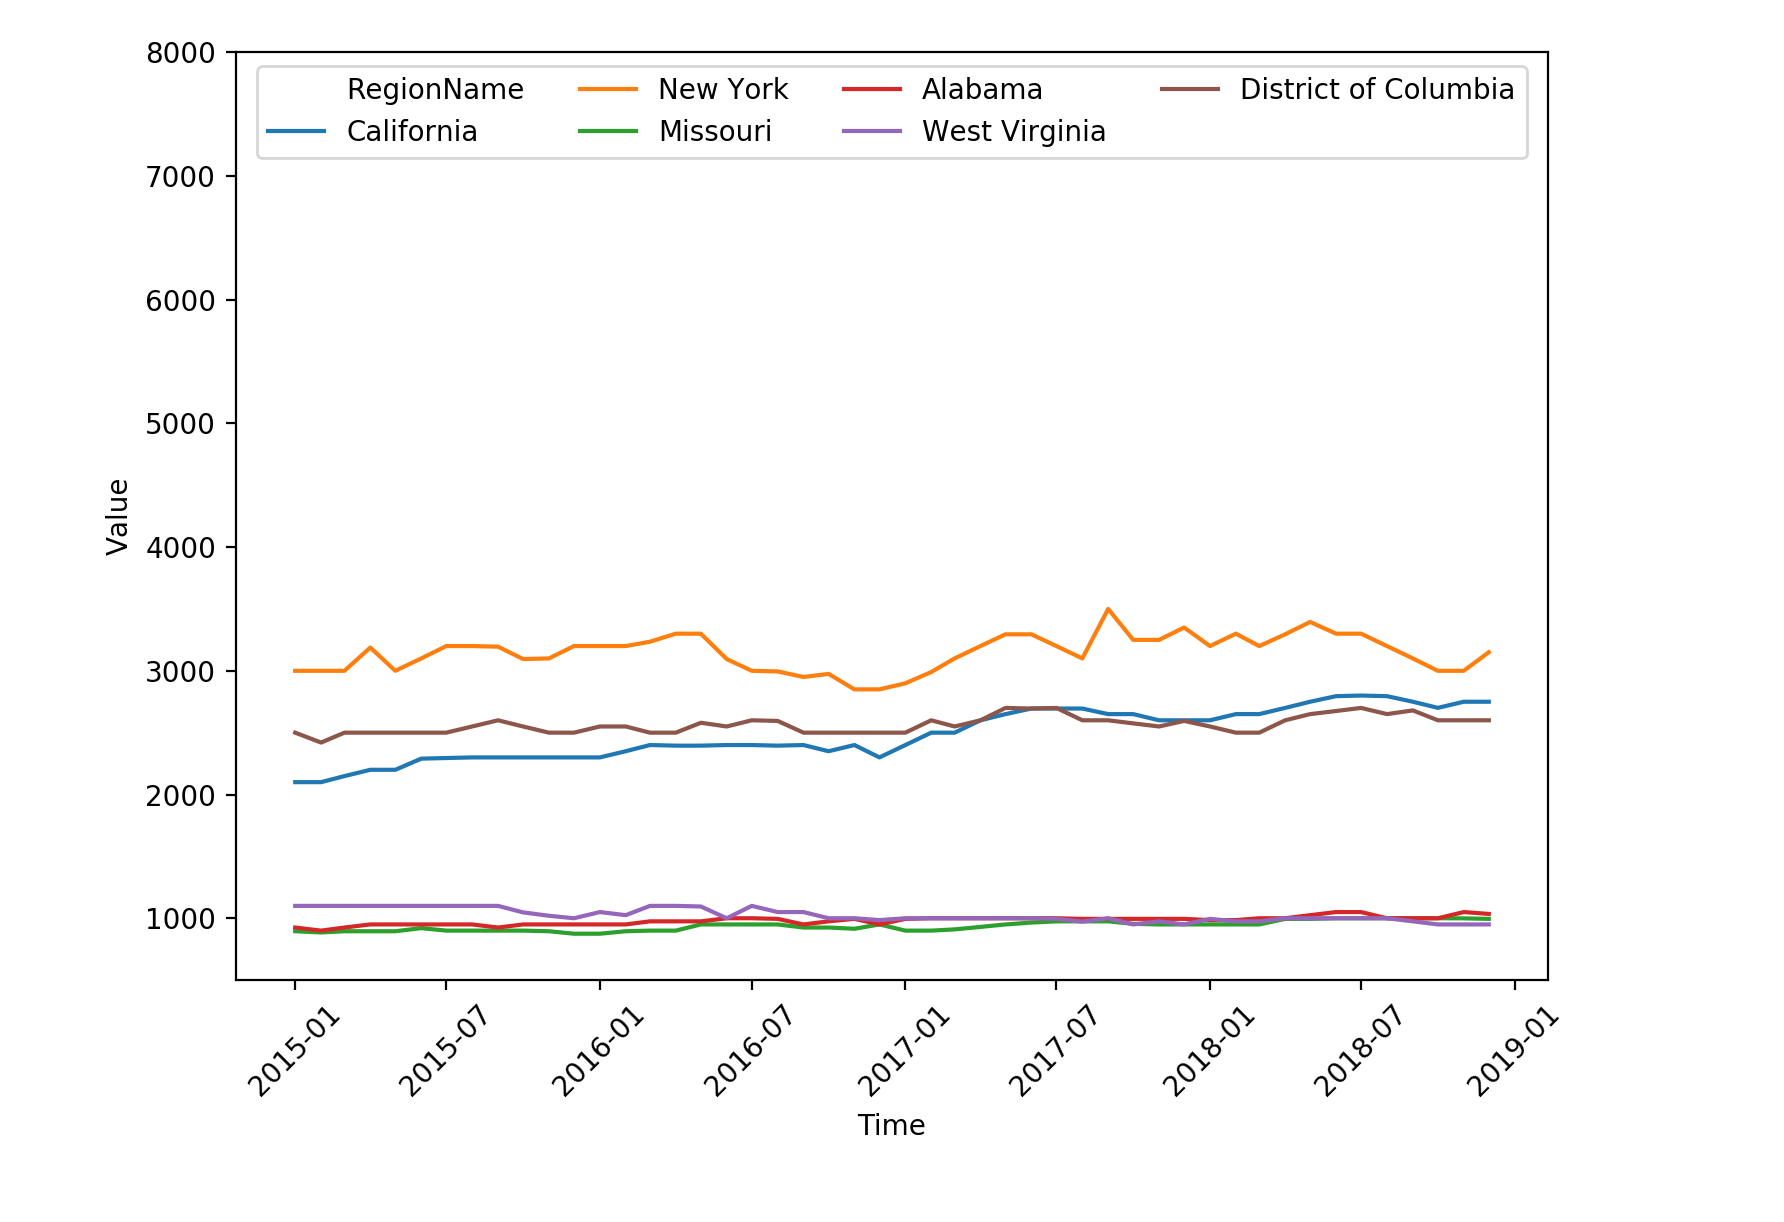

In [7]:
%matplotlib notebook

#Plot the change in rent from Jan 2015 to Dec 2017 for each of the selected states
sns.lineplot(x="Time", y="Value", data=all_homes_long, hue='RegionName', legend='full')
plt.xticks(rotation=45)

# Move the legend to an empty part of the plot
plt.legend(loc='upper center', ncol=4)
plt.ylim(500, 8000)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


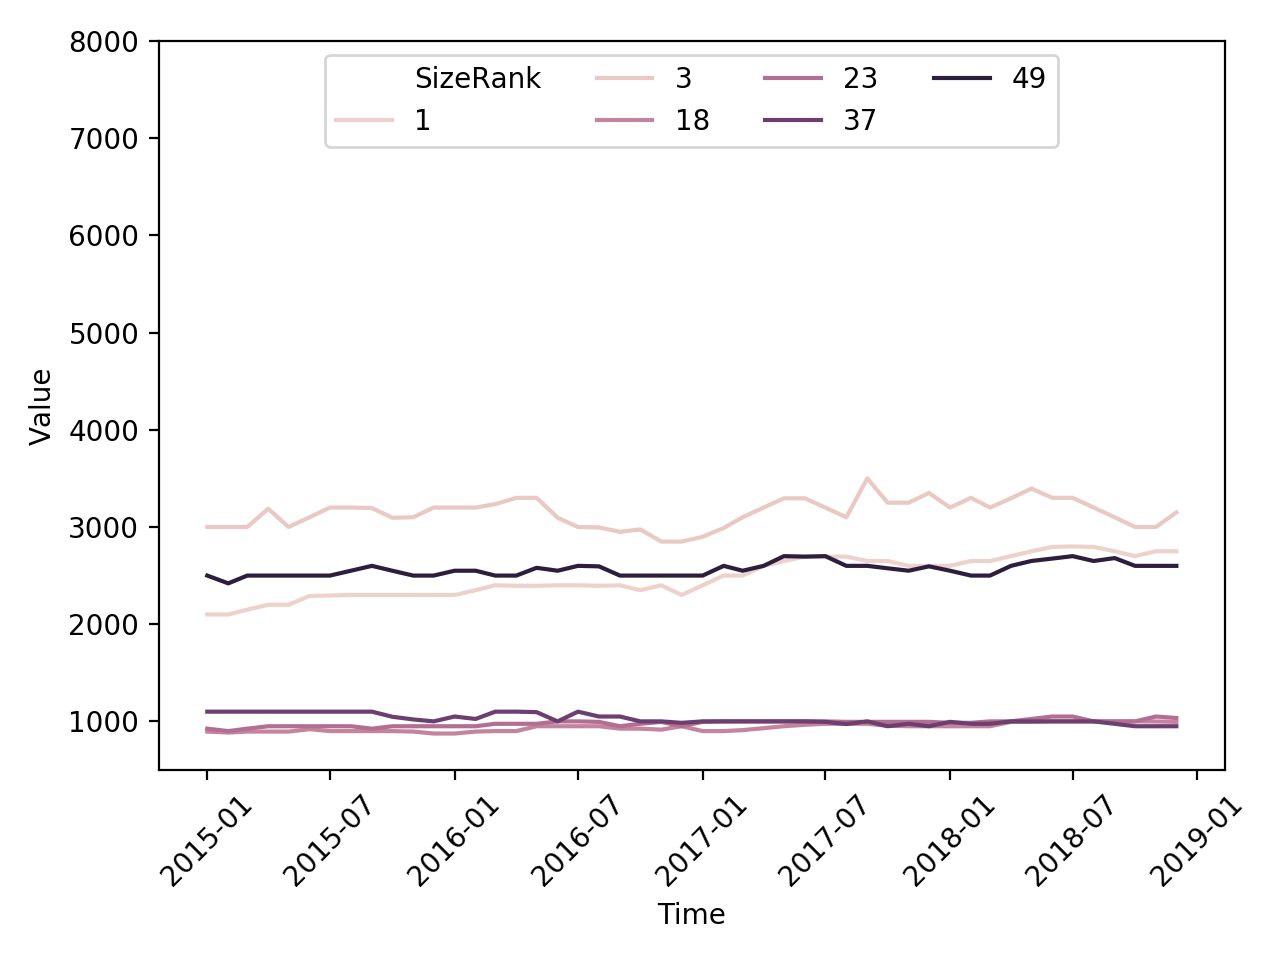

In [9]:
%matplotlib notebook

#Plot the change in rent from Jan 2015 to Dec 2017 for each of the selected states
sns.lineplot(x="Time", y="Value", data=all_homes_long, hue='SizeRank', legend='full')
plt.xticks(rotation=45)

# Move the legend to an empty part of the plot
plt.legend(loc='upper center', ncol=4)
plt.ylim(500, 8000)
plt.show()
plt.tight_layout()